In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RateDistortion import *
from ProgressBar import ProgressBar
from scipy.linalg import null_space,pinv

In [2]:
# Reward matrix
R = np.array([[3,0,0],[0,3,0],[0,0,3]])

# Prior probability
px = np.array([1,1,1])/3

# Generate R(D) curves for each strategy matrix S
S = np.array([[0.7,0.15,0.15],[0.15,0.7,0.15]])
dxy = getFullDistortionFunction(R,S)
r2 = getRD(px,dxy,numPoints=400,show_pb=True)

S = np.array([[0.7,0.15,0.15],[0.15,0.7,0.15],[0.15,0.15,0.7]])
dxy = getFullDistortionFunction(R,S)
r3 = getRD(px,dxy,numPoints=400,show_pb=True)

S = np.array([[0.7,0.15,0.15],[0.15,0.7,0.15],[0.15,0.15,0.7],[0.4,0.3,0.3]])
dxy = getFullDistortionFunction(R,S)
r4 = getRD(px,dxy,numPoints=400,show_pb=True)

In [3]:
# For S with 4 rows, this cell finds the range of solutions where the bound is achieved with equality

S = np.array([[0.7,0.15,0.15],[0.15,0.7,0.15],[0.15,0.15,0.7],[0.4,0.3,0.3]])

py0 = px @ pinv(S) # initial solution
v = null_space(S.T)[:,0] # null space vector

# find ranges for each coordinate
a = [-py0[i]/v[i] for i in range(len(py0))]
b = [(1-py0[i])/v[i] for i in range(len(py0))]
mins = [np.min([a[i],b[i]]) for i in range(len(py0))]
maxs = [np.max([a[i],b[i]]) for i in range(len(py0))]

r = np.array([np.max(mins),np.min(maxs)])

# find distortions
Dxy = -np.log(S @ R)
dist = np.zeros(2)
rate = np.zeros(2)
for i in [0,1]:
    pyq = py0 + r[i]*v
    pxy = np.diag(pyq) @ S
    rate[i] = MI(pxy)
    dist[i] = np.sum(pxy * Dxy)

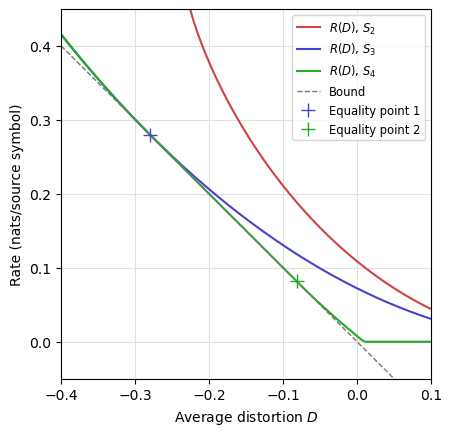

In [4]:
plt.plot(r2['Dmax_v'],r2['r_v'],linestyle='-',
         color='#cc4444',markersize=3,label='$R(D)$, $S_2$')
plt.plot(r3['Dmax_v'],r3['r_v'],linestyle='-',
         color='#4444cc',markersize=3,label='$R(D)$, $S_3$')
plt.plot(r4['Dmax_v'],r4['r_v'],linestyle='-',
         color='#22aa22',markersize=3,label='$R(D)$, $S_4$')

# plots the bound line
dmin = np.min(np.hstack((r2['Dmax_v'],r3['Dmax_v'],r4['Dmax_v'])))
dmax = np.max(np.hstack((r2['Dmax_v'],r3['Dmax_v'],r4['Dmax_v'])))

L = getAvgLambdaStar(R,px)
D_v = np.array([dmin,dmax])
B_v = hx(px) - D_v - L

plt.plot(D_v,B_v,color='#777777',linestyle='--',linewidth=1,label='Bound')

# plots the optimality limits for the 4-strategy line
plt.plot([dist[0]],[rate[0]],color='#4444cc',marker='+',markersize=10,linestyle='None',
        label='Equality point 1')
plt.plot([dist[1]],[rate[1]],color='#22aa22',marker='+',markersize=10,linestyle='None',
        label='Equality point 2')


plt.axis([-0.4,0.1,-0.05,0.45])

plt.xlabel('Average distortion $D$')
plt.ylabel('Rate (nats/source symbol)')
plt.legend(fontsize='small')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.gca().grid(visible=True,color='#e0e0e0')

plt.savefig('Figure4.pdf',bbox_inches='tight')